In [1]:
import numpy as np
import matplotlib.pyplot as plt
mtx_ours_path = "E:/WIN/Desktop/ours_timingMatrix1625417382.npy"
mtx_ref_path = "E:/WIN/Desktop/reference_timingMatrix1625417382.npy"
taxa_values = ['125', '125', '125', '218', '218', '218', '714', '714', '714', '141', '141', '141', '24', '24', '24', '885', '885', '885', '354', '354', '354', '350', '350', '350', '1288', '1288', '1288', '150', '150', '150', '143', '143', '143', '148', '148', '148', '404', '404', '404', '500', '500', '500', '628', '628', '628', '994', '994', '994']
tree_values = [2,10,100]
# arrays have the dimensions [numberofTrees_idx][File / number_taxa_id][metric]


In [2]:
ref = np.load(mtx_ref_path, allow_pickle=True)
ours = np.load(mtx_ours_path, allow_pickle=True)
num_taxa = [int(i) for i in set(taxa_values)]
num_taxa.sort()
np.average(ours)

7253377873.913043

In [28]:
def deleteZeroRows(inArr):
    rowsToDelete = []
    for i in range(np.shape(inArr)[0]):
        if not np.any(inArr[i]):
            rowsToDelete.append(i)
    return np.delete(inArr, rowsToDelete, 0)

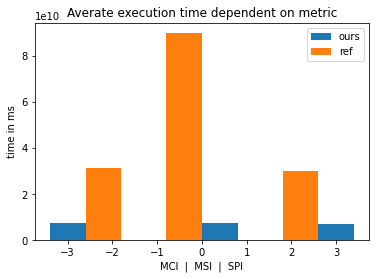

In [3]:
plt.bar([-3,.4,3], np.average(np.average(ours,axis=1),axis=0), label="ours")
plt.bar([-2.2,-.4,2.2], np.average(np.average(ref,axis=1),axis=0), label="ref")
plt.ylabel("time in ms")
plt.xlabel("MCI  |  MSI  |  SPI")
plt.title("Averate execution time dependent on metric")
plt.legend()
plt.show()

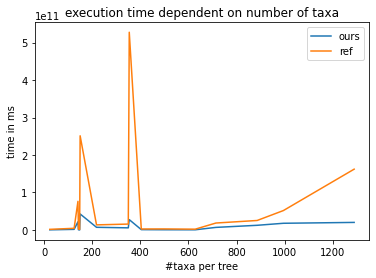

In [30]:
# plot contribution of taxa count
#need to get rid of zero-rows because of skipped files
noZerosOurs = deleteZeroRows(np.average(np.average(ours,axis=2),axis=0))
noZerosRef = deleteZeroRows(np.average(np.average(ref,axis=2),axis=0))

plt.plot(num_taxa,noZerosOurs, label="ours")
plt.plot(num_taxa,noZerosRef, label="ref")
plt.title("execution time dependent on number of taxa")
plt.ylabel("time in ms")
plt.xlabel("#taxa per tree")
plt.legend()
plt.show()


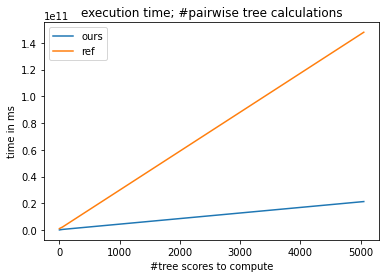

In [38]:
# plot contribution of tree count
tree_calcs = [i*(i+1)/2 for i in tree_values]
plt.plot(tree_calcs,np.average(np.average(ours,axis=2), axis=1), label="ours")
plt.plot(tree_calcs,np.average(np.average(ref,axis=2), axis=1), label="ref")
plt.title("execution time; #pairwise tree calculations")
plt.ylabel("time in ms")
plt.xlabel("#tree scores to compute")
plt.legend()
plt.show()
